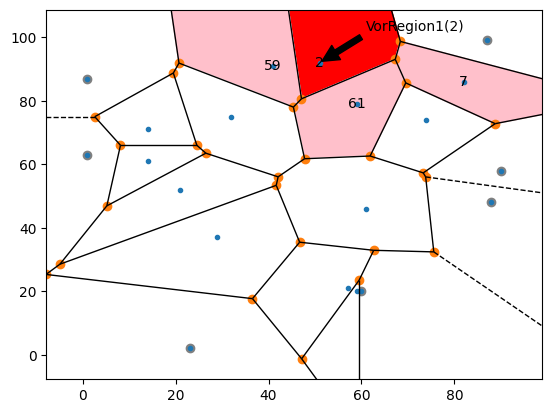

In [2]:
# This is code block Voronoi(f)

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from sympy import isprime

# Generate a two-dimensional list of 20 random integers.
np.random.seed(42)  # for reproducibility
var_rand = np.random.randint(0, 100, (20, 2))

# Create Voronoi tessellation using Fortune's algorithm.
vor = Voronoi(var_rand)

# Generate ascending prime numbers to label cells.
def generate_primes(n):
    primes = []
    num = 2  # Starting from the first prime number
    while len(primes) < n:
        if isprime(num):
            primes.append(num)
        num += 1
    return primes

primes = generate_primes(len(var_rand))

# Plot Voronoi tessellation
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax)
ax.scatter(var_rand[:, 0], var_rand[:, 1], c='gray', marker='o')

# Find the central cell corresponding to the first prime (2) and its adjacent cells
central_prime = 2
central_cell_index = primes.index(central_prime)
adjacent_indices = [i for i, j in vor.ridge_points if j == central_cell_index]
adjacent_indices += [j for i, j in vor.ridge_points if i == central_cell_index]
adjacent_cells = [primes[i] for i in adjacent_indices]

# Color and label Voronoi cells
for i, region in enumerate(vor.regions):
    if not -1 in region and len(region) > 0:
        polygon = [vor.vertices[i] for i in region]
        ax.fill(*zip(*polygon), color='white')  # Reset to default color

        # Find the corresponding point for this region
        point_index = np.where(vor.point_region == i)[0][0]
        prime = primes[point_index]
        x, y = var_rand[point_index]

        text_params = {'ha': 'center', 'va': 'center', 'weight': 'normal', 'color': 'black'}

        if prime == central_prime:
            ax.fill(*zip(*polygon), color='red')
            ax.text(x, y, str(prime), **text_params)
            ax.annotate("VorRegion1(2)", xy=(x, y), xytext=(x+10, y+10),
                        arrowprops=dict(facecolor='black', shrink=0.05))
        elif prime in adjacent_cells:
            ax.fill(*zip(*polygon), color='pink')
            ax.text(x, y, str(prime), **text_params)

# Show plot
plt.show()


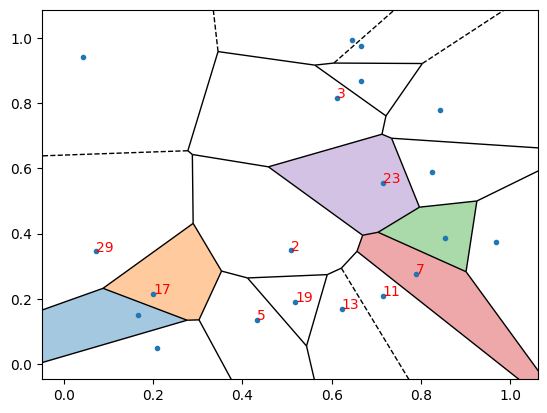

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from sympy import primerange

# Function to find adjacent cells
def find_adjacent_cells(vor, idx):
    adjacent = set()
    for simplex in vor.ridge_points:
        if idx in simplex:
            adjacent |= set(simplex)
    adjacent.discard(idx)
    return list(adjacent)

# Step 1: Generate random points and create Voronoi Diagram
points = np.random.rand(20, 2)  # 20 random points
vor = Voronoi(points)

# Step 2: Label the first cell with the first prime
primes = list(primerange(0, 100))  # Generate a list of prime numbers
first_cell_label = primes[0]  # First prime number

# Step 3 & 4: Identify adjacent cells and assign ascending prime numbers
central_cell_idx = 0  # Assuming the first cell is central
adjacent_cells = find_adjacent_cells(vor, central_cell_idx)
vr_cells = {central_cell_idx: first_cell_label}
for i, adj_cell in enumerate(adjacent_cells, start=1):
    vr_cells[adj_cell] = primes[i]  # Assigning ascending primes

# Step 5: Visualize with colored VR
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='black')
regions, vertices = vor.regions, vor.vertices

# Coloring the VR cells
for idx, region in enumerate(regions):
    if not -1 in region and idx in vr_cells:
        polygon = [vertices[i] for i in region]
        ax.fill(*zip(*polygon), alpha=0.4)

# Annotating cells with their prime numbers
for idx, point in vr_cells.items():
    ax.text(points[idx, 0], points[idx, 1], str(point), color='red')

plt.show()
